In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

In [2]:
df = pd.read_csv("E:\waterquality\\nba.csv")

In [3]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [4]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [5]:
df1 = df.iloc[:,[2,3,8]]

In [6]:
df1.isnull().sum()

Number       1
Position     1
Salary      12
dtype: int64

In [7]:
df1.mean()

C:\Users\vishn\AppData\Local\Temp/ipykernel_16388/2053335143.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


Number    1.767834e+01
Salary    4.842684e+06
dtype: float64

In [8]:
t = df1.groupby('Position')

In [9]:
t.count()

,Number,Salary
Position,,
C,78,78
PF,100,97
PG,92,88
SF,85,84
SG,102,99


In [10]:
m = df1.dropna()

In [11]:
import seaborn as sns

In [12]:
m = df1.dropna()

In [13]:
m

,Number,Position,Salary
0,0.0,PG,7730337.0
1,99.0,SF,6796117.0
3,28.0,SG,1148640.0
4,8.0,PF,5000000.0
5,90.0,PF,12000000.0
...,...,...,...
452,41.0,PF,2239800.0
453,8.0,PG,2433333.0
454,25.0,PG,900000.0
455,21.0,C,2900000.0


C:\Users\vishn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

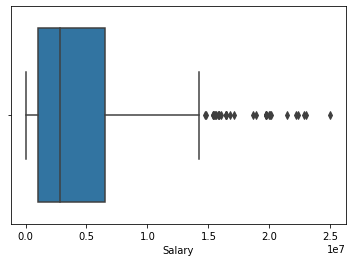

In [14]:
sns.boxplot(m['Salary'])

In [15]:

df1['Salary'] = df1['Salary'].fillna(df1['Salary'].mode()[0])

C:\Users\vishn\AppData\Local\Temp/ipykernel_16388/63148095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Salary'] = df1['Salary'].fillna(df1['Salary'].mode()[0])


In [16]:
df1['Salary'].isnull().sum()

0

In [17]:
df1.isna().sum()

Number      1
Position    1
Salary      0
dtype: int64

In [32]:
df1.dropna(inplace=True)

C:\Users\vishn\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [33]:
df1.head(10)

,Number,Position,Salary,Position_new
0,0.0,PG,7730337.0,2
1,99.0,SF,6796117.0,3
2,30.0,SG,947276.0,4
3,28.0,SG,1148640.0,4
4,8.0,PF,5000000.0,1
5,90.0,PF,12000000.0,1
6,55.0,PF,1170960.0,1
7,41.0,C,2165160.0,0
8,12.0,PG,1824360.0,2
9,36.0,PG,3431040.0,2


In [34]:
t = df1.groupby(['Position']).count()

In [35]:
t1 = list(t.shape)
t1[0]


5

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [36]:
df1['Position_new'] = le.fit_transform(df1['Position'])

C:\Users\vishn\AppData\Local\Temp/ipykernel_16388/3645903406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Position_new'] = le.fit_transform(df1['Position'])


In [25]:
df1

,Number,Position,Salary,Position_new
0,0.0,PG,7730337.0,2
1,99.0,SF,6796117.0,3
2,30.0,SG,947276.0,4
3,28.0,SG,1148640.0,4
4,8.0,PF,5000000.0,1
...,...,...,...,...
452,41.0,PF,2239800.0,1
453,8.0,PG,2433333.0,2
454,25.0,PG,900000.0,2
455,21.0,C,2900000.0,0


In [26]:
#df1.drop(['Position'],axis=1)

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
OneHotEncoder?

In [29]:
ohe = OneHotEncoder(sparse='False',handle_unknown='error',drop='first')

In [30]:
np.reshape?

In [31]:
ohe.fit_transform(df1['Position'])

ValueError: Expected 2D array, got 1D array instead:
array=['PG' 'SF' 'SG' 'SG' 'PF' 'PF' 'PF' 'C' 'PG' 'PG' 'C' 'PG' 'SG' 'SG' 'C'
 'SG' 'SG' 'SG' 'SG' 'PG' 'SG' 'SG' 'PG' 'C' 'PF' 'PF' 'PF' 'C' 'PG' 'PF'
 'SG' 'PF' 'SF' 'SF' 'PG' 'SF' 'SG' 'PG' 'C' 'PF' 'PF' 'C' 'SF' 'SG' 'PF'
 'SG' 'PF' 'PG' 'SF' 'C' 'SF' 'PF' 'PF' 'PG' 'PG' 'PF' 'C' 'PG' 'SG' 'SG'
 'PF' 'C' 'SF' 'SF' 'SG' 'PF' 'PG' 'PG' 'C' 'PF' 'SG' 'SF' 'PF' 'PF' 'C'
 'PG' 'SG' 'SF' 'C' 'SG' 'PG' 'C' 'PF' 'SF' 'PG' 'SF' 'SF' 'SF' 'C' 'SG'
 'PF' 'C' 'PF' 'SG' 'SF' 'SF' 'PF' 'SF' 'C' 'PF' 'PG' 'SF' 'PG' 'SG' 'PG'
 'SG' 'PF' 'C' 'SF' 'SF' 'PG' 'C' 'PG' 'PF' 'PF' 'PF' 'PG' 'C' 'SG' 'SF'
 'SF' 'PG' 'SG' 'SF' 'C' 'SG' 'SG' 'PG' 'C' 'PF' 'PG' 'PG' 'PF' 'SF' 'SF'
 'C' 'SF' 'SG' 'SG' 'SF' 'SF' 'C' 'PG' 'C' 'SG' 'PF' 'SF' 'C' 'SG' 'PF'
 'PG' 'PF' 'PG' 'SG' 'SG' 'PF' 'C' 'PF' 'SG' 'SF' 'PF' 'SG' 'C' 'PF' 'PG'
 'SF' 'PG' 'PF' 'PG' 'SF' 'SF' 'SG' 'SG' 'C' 'PF' 'SG' 'C' 'SG' 'SG' 'C'
 'PG' 'C' 'C' 'PG' 'PG' 'SF' 'SG' 'PG' 'C' 'SF' 'SF' 'PG' 'SF' 'SG' 'PF'
 'PF' 'PF' 'PF' 'SG' 'SF' 'PG' 'C' 'SF' 'PG' 'C' 'SF' 'SG' 'PG' 'PF' 'PF'
 'PG' 'SF' 'PG' 'PG' 'SG' 'PG' 'PF' 'SF' 'SG' 'SG' 'C' 'SF' 'PF' 'PF' 'C'
 'PG' 'SG' 'SG' 'PG' 'SF' 'PG' 'PG' 'PF' 'SG' 'C' 'C' 'PF' 'C' 'SF' 'PF'
 'PF' 'PG' 'SF' 'SF' 'PG' 'SG' 'PF' 'SF' 'PG' 'SG' 'PF' 'C' 'PF' 'SG' 'PF'
 'C' 'SG' 'SG' 'SG' 'PF' 'SF' 'SG' 'PG' 'PG' 'PG' 'C' 'PF' 'SF' 'PF' 'PG'
 'PG' 'PF' 'SF' 'PF' 'PF' 'C' 'PF' 'C' 'SF' 'PG' 'PF' 'PF' 'SG' 'PG' 'SF'
 'SG' 'PG' 'SF' 'SG' 'SG' 'PG' 'SG' 'C' 'SF' 'PF' 'SF' 'C' 'C' 'C' 'SG'
 'SG' 'SF' 'C' 'SG' 'PG' 'PG' 'PG' 'SG' 'PF' 'SF' 'SG' 'SG' 'C' 'PF' 'SG'
 'PF' 'PF' 'SG' 'PG' 'PF' 'SF' 'C' 'C' 'PG' 'SG' 'SG' 'PG' 'PF' 'SG' 'PF'
 'C' 'C' 'SF' 'SG' 'SG' 'PG' 'PG' 'PF' 'C' 'PF' 'SF' 'PG' 'SF' 'PF' 'SF'
 'SG' 'PF' 'SG' 'PF' 'SG' 'PG' 'C' 'SF' 'SF' 'C' 'SG' 'PF' 'SG' 'PF' 'PG'
 'SF' 'PG' 'PF' 'SG' 'PG' 'PF' 'C' 'PG' 'SG' 'SG' 'SF' 'SG' 'PF' 'C' 'C'
 'C' 'PF' 'SF' 'SF' 'PG' 'SG' 'SF' 'PG' 'PF' 'PG' 'SF' 'SF' 'PF' 'SF' 'SG'
 'C' 'C' 'SG' 'PG' 'PG' 'C' 'SG' 'SG' 'PF' 'C' 'PF' 'PG' 'PG' 'SF' 'PF'
 'C' 'SF' 'PG' 'SF' 'PF' 'C' 'SG' 'C' 'PF' 'SF' 'SG' 'SF' 'PF' 'C' 'PF'
 'C' 'SG' 'PG' 'SG' 'SF' 'SG' 'PG' 'PF' 'SF' 'SG' 'SG' 'C' 'SF' 'SG' 'C'
 'PF' 'PG' 'SG' 'SG' 'C' 'PG' 'PF' 'PF' 'PG' 'SG' 'PG' 'PF' 'C' 'SF' 'SG'
 'SF' 'SF' 'PF' 'PG' 'PG' 'C' 'C'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df1['Position'].reshape(-1,1)

In [ ]:
x = np.array(df1['Position'])

In [ ]:
x.reshape(-1,1)

In [ ]:
x_df = pd.DataFrame(x)

In [ ]:
df1 = df1.join(x_df)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        457 non-null    float64
 1   Position      457 non-null    object 
 2   Salary        457 non-null    float64
 3   Position_new  457 non-null    int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 16.1+ KB


In [47]:
xtrain_1 = df1.iloc[:,[3]]

In [48]:
xtrain_1

,Position_new
0,2
1,3
2,4
3,4
4,1
...,...
452,1
453,2
454,2
455,0


In [41]:
ytrain_1 = df1.iloc[:,[2]]

In [43]:
ytrain_1

,Salary
0,7730337.0
1,6796117.0
2,947276.0
3,1148640.0
4,5000000.0
...,...
452,2239800.0
453,2433333.0
454,900000.0
455,2900000.0


In [46]:
xtrain_1.isna().sum()

Position    0
dtype: int64

In [49]:
from sklearn.linear_model import LinearRegression

In [51]:
l1 = LinearRegression()

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(xtrain_1,ytrain_1)

In [57]:
t = l1.fit(x_train,y_train)

In [59]:
y_pred = t.predict(x_test)

In [62]:
lst = []
for i in y_pred:
    lst.append(float(int(i)))
print(lst)

[4782219.0, 5578158.0, 5180188.0, 5578158.0, 3986280.0, 4782219.0, 5578158.0, 3986280.0, 4782219.0, 5578158.0, 4782219.0, 5578158.0, 5578158.0, 5578158.0, 3986280.0, 4782219.0, 5180188.0, 4782219.0, 5578158.0, 5578158.0, 4384249.0, 4782219.0, 3986280.0, 4384249.0, 4782219.0, 4782219.0, 5578158.0, 5180188.0, 5578158.0, 4782219.0, 4384249.0, 5578158.0, 4782219.0, 5578158.0, 5578158.0, 3986280.0, 3986280.0, 4384249.0, 4782219.0, 5180188.0, 5180188.0, 4782219.0, 4782219.0, 4384249.0, 5180188.0, 4384249.0, 4384249.0, 3986280.0, 5180188.0, 4384249.0, 4782219.0, 4384249.0, 4782219.0, 5578158.0, 4384249.0, 5180188.0, 3986280.0, 5180188.0, 3986280.0, 4782219.0, 5180188.0, 3986280.0, 5180188.0, 5578158.0, 4782219.0, 3986280.0, 3986280.0, 3986280.0, 3986280.0, 4384249.0, 5578158.0, 4384249.0, 5180188.0, 4782219.0, 5180188.0, 3986280.0, 5180188.0, 4384249.0, 5180188.0, 4782219.0, 4384249.0, 4384249.0, 4782219.0, 3986280.0, 4782219.0, 4384249.0, 5180188.0, 5578158.0, 5180188.0, 3986280.0, 4384249.0

In [84]:
from sklearn.metrics import mean_absolute_error

In [82]:
d = pd.DataFrame(lst)
t = mean_absolute_error(d,y_pred)

In [83]:
print("mean_absoluter error is",t*100)

mean_absoluter error is 32.60466428068669


In [86]:
accuracy = print(100-t*100)

67.39533571931331
